# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Data cleaning

## Identify any null or missing data, and impute appropriate replacement values.


In [7]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [8]:
df_flights.DepDel15.value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [10]:
# fill null values with most frequent value (0)
df_flights.DepDel15.fillna(0, inplace=True)
df_flights.isnull().sum().sum()

0

## Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

In [12]:
df_small = df_flights[['DepDelay', 'ArrDelay']]
df_small.head(2)

,DepDelay,ArrDelay
0,4,13
1,3,22


In [16]:
df_small.describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


<AxesSubplot:>

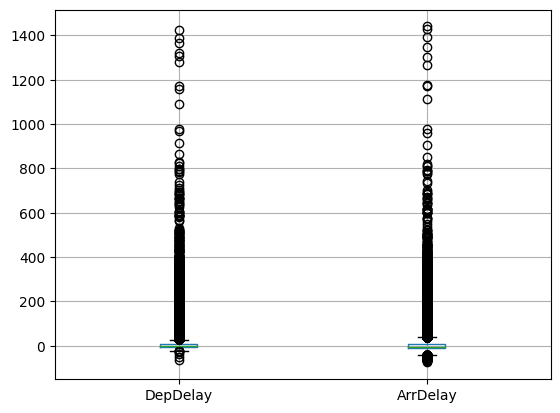

In [20]:
df_small.boxplot()

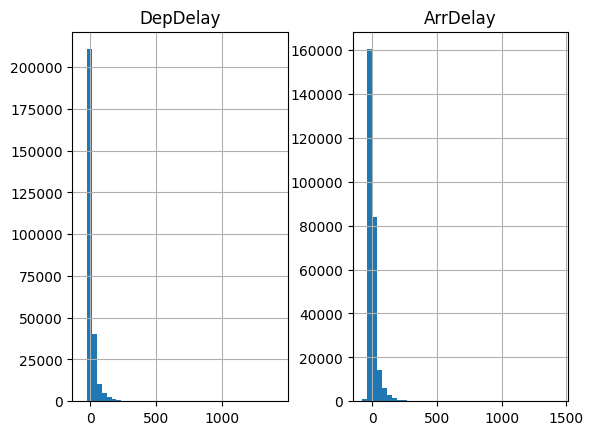

In [29]:
df_small.hist(bins=40);

In [28]:
df_small.describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


In [71]:
def outlier_filter(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    r1 = q1-1.5*IQR
    r2 = q3+1.5*IQR
    
    no_outliers = df[(df>=r1) & (df<=r2)]
    return no_outliers

In [76]:
df_no_outliers = outlier_filter(df_small).dropna()

array([[<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

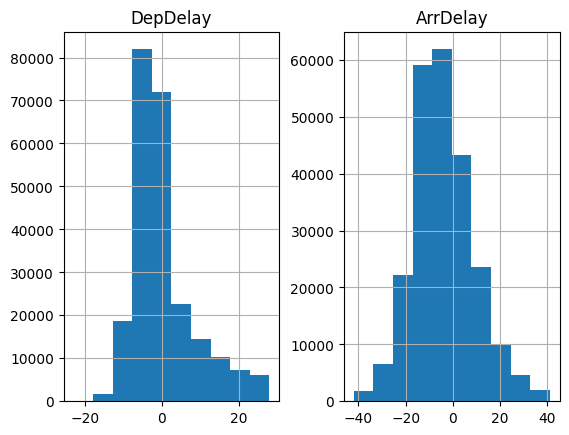

In [77]:
df_no_outliers.hist()

<AxesSubplot:>

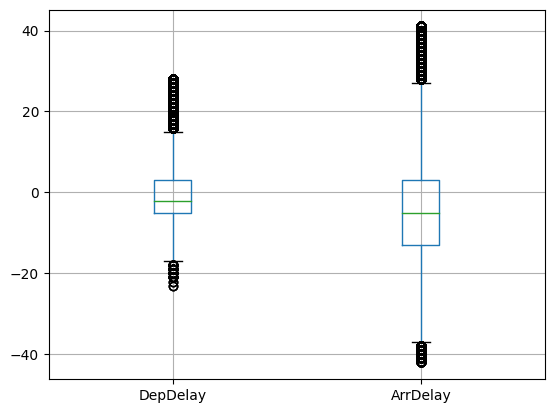

In [78]:
df_no_outliers.boxplot()

# Explore the data

## View summary statistics for the numeric fields in the dataset.

- Determine the distribution of the **DepDelay** and **ArrDelay** columns.
- Use statistics, aggregate functions, and visualizations to answer the following questions:

In [93]:
index_lst = df_no_outliers.index.to_list()
df_filtered = df_flights.iloc[index_lst]

In [108]:
by_origin_state = df_filtered.groupby('OriginState').sum()[['DepDelay', 'ArrDelay']]
by_origin_state.head()

,DepDelay,ArrDelay
OriginState,,
AK,-2089,-5083
AZ,5429,-19815
CA,16984,-107921
CO,22614,-7937
CT,-723,-7985


<AxesSubplot:xlabel='OriginState'>

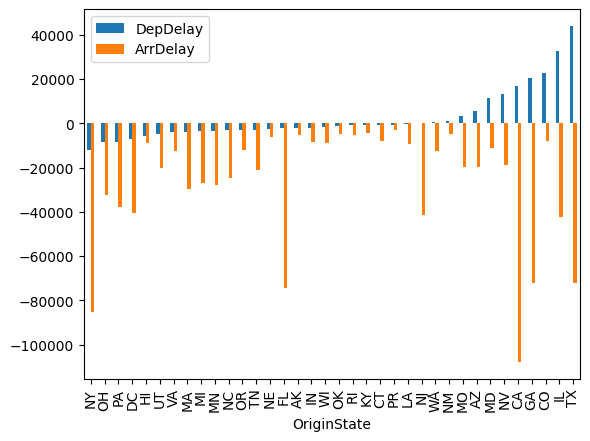

In [111]:
by_origin_state.sort_values(['DepDelay','ArrDelay']).plot(kind='bar')

In [112]:
df_filtered

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0


<AxesSubplot:xlabel='DestState'>

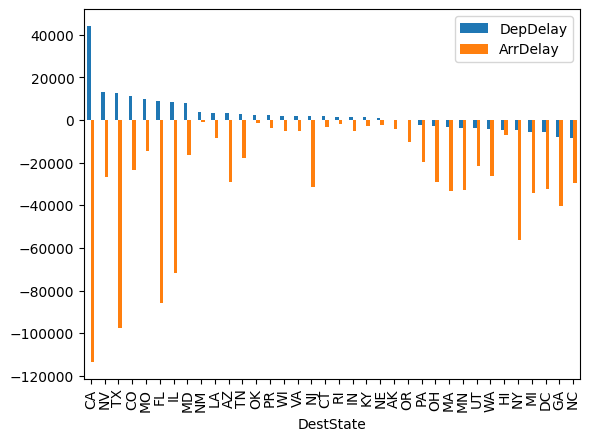

In [114]:
by_dest_state = df_filtered.groupby('DestState').sum()[['DepDelay', 'ArrDelay']]
by_dest_state.sort_values(['DepDelay','ArrDelay'], ascending=False).plot(kind='bar')

#### ratio

In [120]:
by_origin_state_c = df_filtered.groupby('OriginState').count()[['DepDelay']]
by_origin_state_c.rename(columns={'DepDelay': 'count'}, inplace=True)

In [121]:
by_origin_state = df_filtered.groupby('OriginState').sum()[['DepDelay', 'ArrDelay']]
by_origin_state['ratioD'] = by_origin_state['DepDelay'] / by_origin_state_c['count']
by_origin_state['ratioA'] =  by_origin_state['ArrDelay'] / by_origin_state_c['count']
by_origin_state

,DepDelay,ArrDelay,ratioD,ratioA
OriginState,,,,
AK,-2089,-5083,-2.975783,-7.240741
AZ,5429,-19815,0.594047,-2.168180
CA,16984,-107921,0.505281,-3.210692
CO,22614,-7937,2.792541,-0.980119
CT,-723,-7985,-0.594572,-6.566612
DC,-7253,-40389,-1.057443,-5.888468
FL,-2245,-74416,-0.123883,-4.106390
GA,20596,-72055,1.568024,-5.485725
HI,-5603,-8707,-2.059926,-3.201103


<AxesSubplot:xlabel='OriginState'>

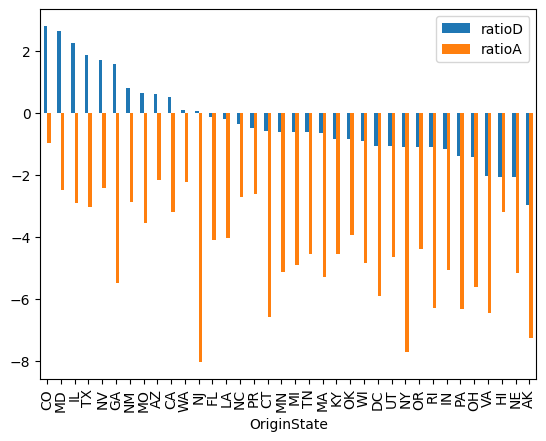

In [124]:
by_origin_state.drop(columns=['DepDelay', 'ArrDelay']).sort_values(['ratioD','ratioA'], ascending=False).plot(kind='bar')

In [126]:
df_small.describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


Average Departure Delay: 10.350449	
Average Arrival Delay: 6.496650 \
(without filtering outliers)

In [148]:
#groupby column name and get the relative average delay time

def group_by_col(column_name):

    col = df_filtered.groupby(column_name).mean()[['DepDelay', 'ArrDelay']]

    return col

### What are the average (mean) departure and arrival delays?

In [149]:
# After filtered outliers
df_filtered[['DepDelay', 'ArrDelay']].mean()

DepDelay    0.373447
ArrDelay   -4.029843
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

In [150]:
df_filtered.head(2)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0


In [151]:
carriers = group_by_col('Carrier')

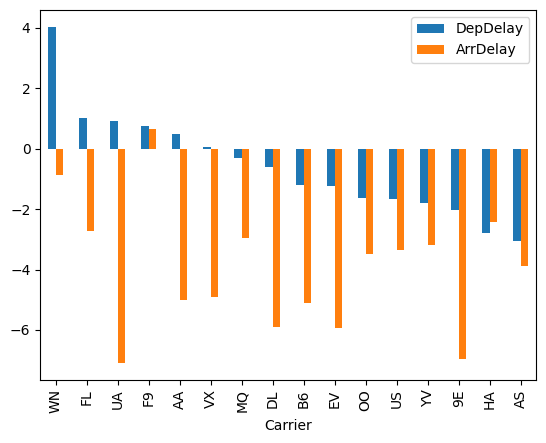

In [153]:
carriers.sort_values(['DepDelay','ArrDelay'], ascending=False).plot(kind='bar');

worst: WN, FL, F9
Best: HA, AS

### Is there a noticable difference in arrival delays for different days of the week?

In [155]:
day_of_week=group_by_col('DayOfWeek')

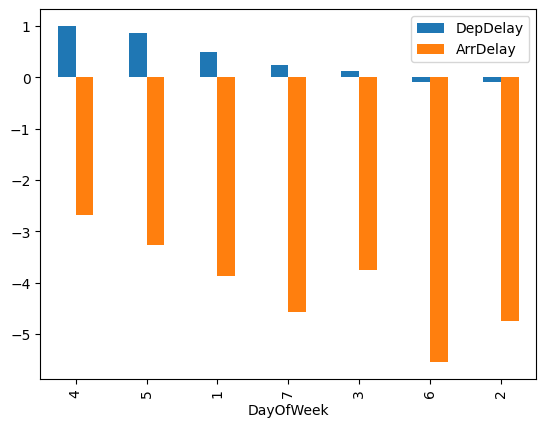

In [156]:
day_of_week.sort_values(['DepDelay','ArrDelay'], ascending=False).plot(kind='bar');

In [147]:
df_filtered.groupby('DayOfWeek').mean()[['ArrDelay']]

,ArrDelay
DayOfWeek,
1,-3.880085
2,-4.756488
3,-3.748446
4,-2.673651
5,-3.272050
6,-5.550434
7,-4.581312


When it comes to *Arrival Delay*, no significant trend was found.\
Thursday & Friday & Monday seem like have the most delay

### Which departure airport has the highest average departure delay?

In [163]:
airport = group_by_col('OriginAirportName')[['DepDelay']].sort_values(by = 'DepDelay', ascending = False)
airport

,DepDelay
OriginAirportName,
Chicago Midway International,4.995548
Dallas Love Field,4.133062
William P Hobby,3.726537
Denver International,2.792541
Baltimore/Washington International Thurgood Marshall,2.630400
...,...
Kahului Airport,-2.568161
Tucson International,-2.590148
Richmond International,-2.698537


- Answer: **Chicago Midway International**

### Do **late** departures tend to result in longer arrival delays than on-time departures?

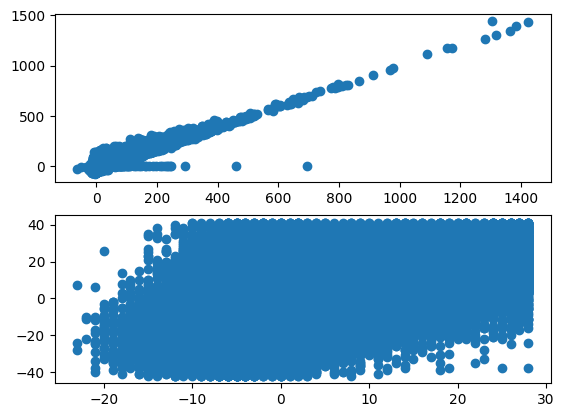

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2)

ax[0].scatter(x=df_small['DepDelay'], y=df_small['ArrDelay'])
ax[1].scatter(x=df_filtered['DepDelay'], y=df_filtered['ArrDelay']);

In [172]:
df_flights[['DepDelay', 'ArrDelay']].corr()

,DepDelay,ArrDelay
DepDelay,1.000000,0.938822
ArrDelay,0.938822,1.000000


<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

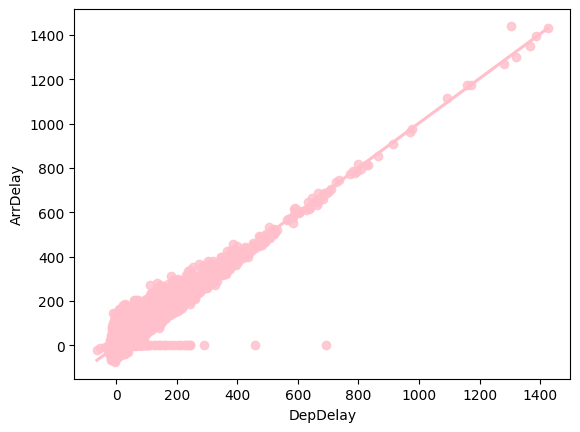

In [192]:
sns.regplot(x=df_small['DepDelay'], y=df_small['ArrDelay'], color='pink', ci = 50)

In [170]:
df_filtered[['DepDelay', 'ArrDelay']].corr()

,DepDelay,ArrDelay
DepDelay,1.000000,0.562099
ArrDelay,0.562099,1.000000


- Answer: *Yes!*

### Which route (from origin airport to destination airport) has the most * late * arrivals?

If it's simply counting the late arrival flights..

In [197]:
df_filtered.groupby(by=['OriginAirportName', 'DestAirportName']).max()[['ArrDelay']].sort_values(by='ArrDelay', ascending=False).head(10)

,,ArrDelay
OriginAirportName,DestAirportName,
Seattle/Tacoma International,Chicago O'Hare International,41
Eppley Airfield,Denver International,41
San Francisco International,Washington Dulles International,41
Buffalo Niagara International,Washington Dulles International,41
John F. Kennedy International,Fort Lauderdale-Hollywood International,41
McCarran International,Minneapolis-St Paul International,41
Charlotte Douglas International,Buffalo Niagara International,41
McCarran International,Newark Liberty International,41
John F. Kennedy International,Chicago O'Hare International,41


In [200]:
df_filtered.groupby(by=['OriginAirportName', 'DestAirportName']).count()[['ArrDelay']].sort_values(by='ArrDelay', ascending=False).head(10)

ArrDelay
OriginAirportName                DestAirportName                        
San Francisco International      Los Angeles International           824
Los Angeles International        San Francisco International         723
Honolulu International           Kahului Airport                     654
Kahului Airport                  Honolulu International              653
McCarran International           Los Angeles International           622
Los Angeles International        McCarran International              606
                                 John F. Kennedy International       532
Phoenix Sky Harbor International Los Angeles International           519
Los Angeles International        San Diego International             514
John F. Kennedy International    Los Angeles International           512

In [207]:
late_arrivals = df_flights[df_flights['ArrDelay'] > 0]
late_arrivals.groupby(by=['OriginAirportName', 'DestAirportName']).count()[['ArrDelay']].sort_values(by = 'ArrDelay', ascending=False)

,,ArrDelay
OriginAirportName,DestAirportName,
Los Angeles International,San Francisco International,462
San Francisco International,Los Angeles International,447
McCarran International,Los Angeles International,308
LaGuardia,Hartsfield-Jackson Atlanta International,301
Kahului Airport,Honolulu International,287
...,...,...
McCarran International,Cincinnati/Northern Kentucky International,1
John F. Kennedy International,Louisville International-Standiford Field,1
Cincinnati/Northern Kentucky International,Phoenix Sky Harbor International,1


Los Angeles International -> San Francisco International has the most late arrivals (Absolute(O) Relative(X))

### Which route has the highest average arrival delay?

In [194]:
df_filtered.groupby(by=['OriginAirportName', 'DestAirportName']).mean()[['ArrDelay']].sort_values(by='ArrDelay', ascending=False)

,,ArrDelay
OriginAirportName,DestAirportName,
Louis Armstrong New Orleans International,Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International,Palm Beach International,18.000000
Denver International,Raleigh-Durham International,13.250000
Indianapolis International,Philadelphia International,10.000000
Palm Beach International,Pittsburgh International,10.000000
...,...,...
Cleveland-Hopkins International,Will Rogers World,-21.875000
Eppley Airfield,LaGuardia,-22.200000
Jacksonville International,Chicago Midway International,-22.727273


##### On Average

Louis Armstrong New Orleans International -> Ronald Reagan Washington National Route has the most late arrivals

## Conclusion

LA airport seems like the worst airport!